In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# url = 'https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing'

data = pd.read_csv('data/train - train.csv')
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


## 1 задание

### а)

Какие подгруппы (Sub-Category) товаров наиболее часто покупают __за все время__ продаж?

*Пояснение*: Группируем данные по подгруппам, считаемп количество вхожденией, сортируем от большого к маленькому и берем первые 4.

In [3]:
data.groupby(["Sub-Category"]).count().sort_values(by=["ID"], ascending=False).head(4)["ID"]

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: ID, dtype: int64

### б)

Какие подгруппы (Sub-Category) товаров наиболее часто покупают __за последние 2 года__

*Пояснение*: То же саме, что в а), только отберем данные за последние 2 года с последней даты

In [4]:
import datetime

# convert from string to date
data["Order Date"] = pd.to_datetime(data["Order Date"]).dt.date

last_date = data["Order Date"].max()
first_date = data["Order Date"].min()
start_date = last_date - pd.to_timedelta('365 day') * 2       # 2 years ago date


print(f"Fist date: {first_date}")
print(f"Last date: {last_date}")
print(f"Start date: {start_date}")

Fist date: 2015-01-02
Last date: 2018-12-30
Start date: 2016-12-30


In [5]:
# only 2 years data
data_2y = data[data["Order Date"] >= start_date]

data_2y.groupby(["Sub-Category"]).count().sort_values(by=["ID"], ascending=False).head(4)["ID"]

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: ID, dtype: int64

Получены ответы на а) и б) (за все время и за 2 псоледних года). 

Но понятно, что в таком виде сранивать неудобно.

Поэтому после пункта в) пересчитаем все с нормировкой на общее число заказов. И, собственно, сам пунк в) -- за последний год.

### в)

Какие подгруппы (Sub-Category) товаров наиболее часто покупают __за последний 1 год__

*Пояснение*: То же саме, что в а), только отберем данные за последний года с последней даты

In [6]:
start_date = last_date - pd.to_timedelta('365 day')      # 2 years ago date

print(f"Start date: {start_date}")

# only 1 year data
data_1y = data[data["Order Date"] >= start_date]

data_1y.groupby(["Sub-Category"]).count().sort_values(by=["ID"], ascending=False).head(4)["ID"]

Start date: 2017-12-30


Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: ID, dtype: int64

### а) б) в) сравнение

Посчитаем общее количество заказов в топовых подкатегориях и разделим на общее число заказов во всех трех периодах.

Т.е. будем смотреть долю подкатегорий во всех заказах.

In [7]:
start_date

datetime.date(2017, 12, 30)

In [8]:
start_date = [first_date, 
              last_date - pd.to_timedelta('365 day') * 2,
              last_date - pd.to_timedelta('365 day') * 1]

for start_day in start_date:
    
    print("Start date:", start_day)
    
    # cut dataset with data
    data_i = data[data["Order Date"] >= start_day]
    
    # Общее число заказов. Все заказы уникальны, я проверил.
    N = data_i.shape[0]

    # количество заказов в процентах
    grouped = data_i.groupby(["Sub-Category"]).count().sort_values(by=["ID"], ascending=False).head(4)["ID"] / N * 100
    print(grouped)
    print()
    
    

Start date: 2015-01-02
Sub-Category
Binders        15.224490
Paper          13.653061
Furnishings     9.500000
Phones          8.938776
Name: ID, dtype: float64

Start date: 2016-12-30
Sub-Category
Binders        15.616391
Paper          13.946281
Furnishings     9.607438
Phones          8.798209
Name: ID, dtype: float64

Start date: 2017-12-30
Sub-Category
Binders        15.154293
Paper          13.871066
Furnishings     9.471433
Phones          8.890926
Name: ID, dtype: float64



### Вывод.

Годами ничего не меняется. В топоваых категориях (по количеству заказов) так и остаются доли в 15%, 14%, 10%, 9%.

Вероятно, синтетические данные.

## 2 задание

Ящик с усами для `Sales`.

In [9]:
# Делаем числа из строк
if data['Sales'].dtype != 'float64':
    data['Sales'] = data['Sales'].str.replace(',', '.').astype(float)

Взглянем на распределение по продажам.

По оси x -- продажи, по y -- частота.

Аномалий нет. Равномерное распределение.

<AxesSubplot:ylabel='Frequency'>

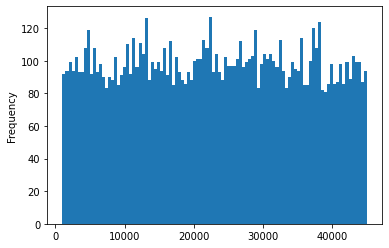

In [10]:
data['Sales'].plot(kind='hist', bins=100)

Сразу рисуем боксплот.

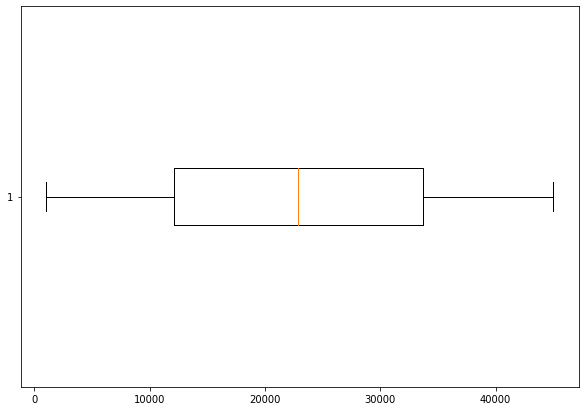

In [11]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data.Sales, 0, 'rs', 0)
plt.show()

## 3 задание

Разбить покупки на группы на основе Sales: маленькие продажт, средние, высокие.

Сгруппировать данные на основе региона и группы.

In [12]:
data.Sales.describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

Как мы уже видели, распределение по Sales равномерное. Поделим ровно на 3.

In [13]:
step_Sales = (data.Sales.max() - data.Sales.min()) / 3 

low_sales = data.Sales.min() + step_Sales
high_sales = data.Sales.max() - step_Sales

def do_sale_groups(x):
    if x <= low_sales:
        return "low sales"
    elif x >= high_sales:
        return "high sales"
    else:
        return "middle sales"

data["Sale_group"] = data.Sales.map(lambda x: do_sale_groups(x))

In [14]:
# Посмотрим регионы

data.Region.unique()

array(['Урал', 'Владивосток', 'Калиниград', 'Москва'], dtype=object)

In [15]:
data.groupby(["Region", "Sale_group"])[["Sales"]].agg(["count", "mean", "sum"])

# продажи в сводных группах могут отличаться по количеству (наибольшая вариативность по признаку региона)
# тогда из трех выбранных функций агррегации подойдет только "среднее"

Sales                            
                         count          mean           sum
Region      Sale_group                                    
Владивосток high sales     944  37552.459439  3.544952e+07
            low sales      947   8302.082951  7.862073e+06
            middle sales   894  23088.470492  2.064109e+07
Калиниград  high sales     991  37699.565106  3.736027e+07
            low sales     1039   8555.503429  8.889168e+06
            middle sales  1110  23135.912288  2.568086e+07
Москва      high sales     530  37652.252962  1.995569e+07
            low sales      520   8245.852623  4.287843e+06
            middle sales   548  23080.500146  1.264811e+07
Урал        high sales     744  37412.720309  2.783506e+07
            low sales      767   8389.712850  6.434910e+06
            middle sales   766  22961.637115  1.758861e+07

In [16]:
pv_t = pd.pivot_table(data, index="Region", columns="Sale_group", values="Sales", aggfunc="mean")
pv_t

Sale_group,high sales,low sales,middle sales
Region,,,
Владивосток,37552.459439,8302.082951,23088.470492
Калиниград,37699.565106,8555.503429,23135.912288
Москва,37652.252962,8245.852623,23080.500146
Урал,37412.720309,8389.712850,22961.637115


<AxesSubplot:xlabel='Region'>

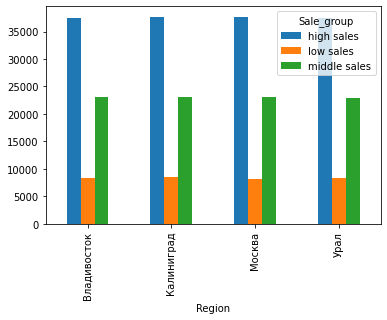

In [17]:
pv_t.plot.bar()

**Вывод**: ничего интересного.

## 4 задание

Спрогнозировать регрессией продажи для

а) Phone

б) Art



In [18]:
start_date = data["Order Date"].max()

# введем колонку отсчета дней от последнего события
data["days"] = (data["Order Date"] - start_date).dt.days

data_pho = data[data["Sub-Category"] == 'Phones']
data_art = data[data["Sub-Category"] == 'Art']


In [19]:
data_pho = data[data["Sub-Category"] == 'Phones']
data_art = data[data["Sub-Category"] == 'Art']

In [20]:
# Посмотрим глазами динамику продаж по дням.

<AxesSubplot:xlabel='Order Date'>

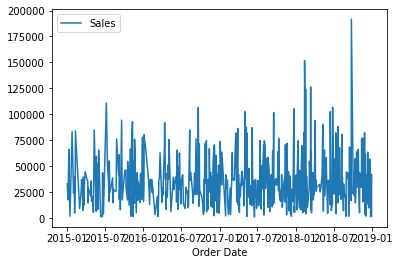

In [21]:
# Сумма продаж телефонов по дням

data_pho.groupby(["Order Date"])[["Sales"]].sum().plot()

<AxesSubplot:xlabel='Order Date'>

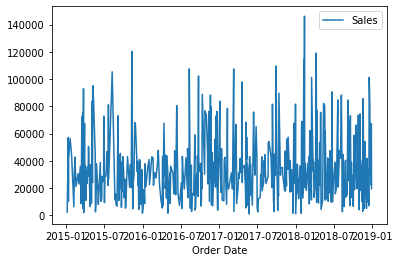

In [22]:
# Сумма продаж арта по дням

data_art.groupby(["Order Date"])[["Sales"]].sum().plot()

In [23]:
# Коэффициенты линейной регркессии

a_pho = np.polyfit(data_pho["days"], data_pho["Sales"], 1)
a_art = np.polyfit(data_art["days"], data_art["Sales"], 1)

print(a_pho)
print(a_art)

# продажи телефонов будут расти по 4 копейки в день
#  а продажи артов падать на ~10 копеек в день

[4.11407807e-01 2.34829583e+04]
[-9.55846897e-01  2.21148636e+04]


In [24]:
def calc_trend(x, a):
    y = a[0] * x + a[1]
    return y

In [25]:
# на два года вперед
days_arr = [i for i in range(data.days.min(), 365*2, 1)]

# функции фитирования
sales_pho_trend = [calc_trend(x, a_pho) for x in days_arr]
sales_art_trend = [calc_trend(x, a_art) for x in days_arr]

#### Тренд для Phones

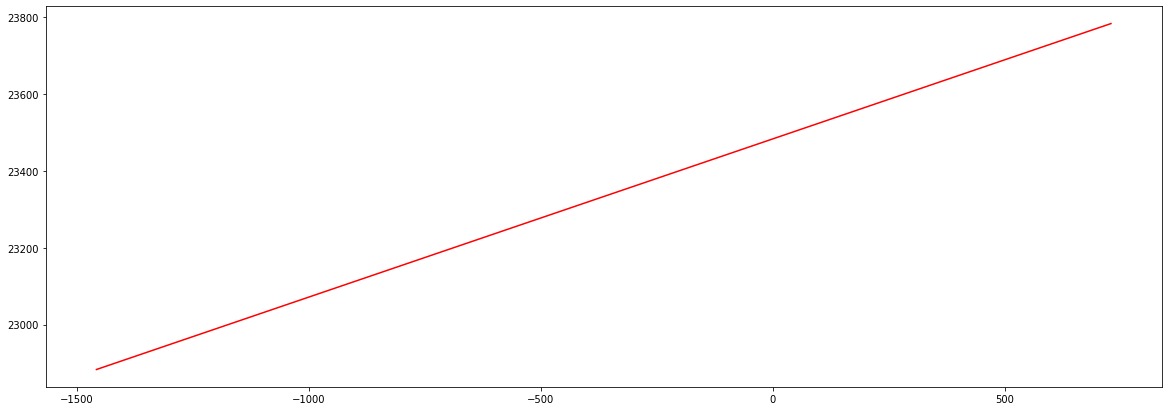

In [26]:
fig = plt.figure(figsize=(20, 7))

# plt.plot(data_pho["days"], data_pho["Sales"], 'go', label="данные")
plt.plot(days_arr, sales_pho_trend, 'r-', label="линия тренда")

#### Тренд для Art

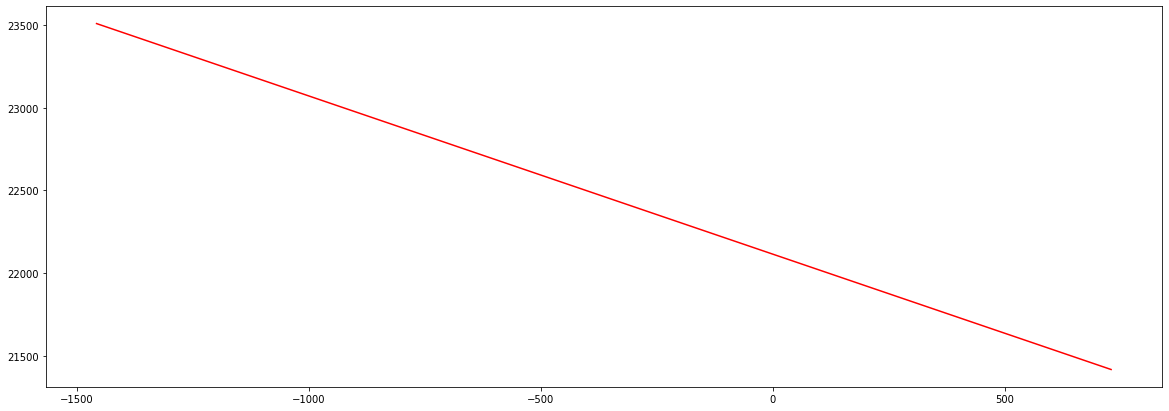

In [27]:
fig = plt.figure(figsize=(20, 7))

# plt.plot(data_art["days"], data_art["Sales"], 'go', label="данные")
plt.plot(days_arr, sales_art_trend, 'r-', label="линия тренда")

### Вывод

Тренты получены на 2 года вперед. Отчет в днях от 0 (последней записи в таблице).

Доверять им нельзя, так как коэффициент наклона линии регрессии слишком мал -- это, скорее всего, просто шум.